#### Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Data Collection and Processing

In [2]:
df = pd.read_csv('car data.csv') 

In [3]:
df.shape

(301, 9)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking missing values

df.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# distribution of categorical data

print(df.Fuel_Type.value_counts()) 
print(df.Seller_Type.value_counts()) 
print(df.Transmission.value_counts()) 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
# encoding
df.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
df.replace({'Seller_Type': {'Dealer':0,'Individual':1}}, inplace=True)
df.replace({'Transmission': {'Manual':0,'Automatic':1}}, inplace=True) 

In [8]:
# duration of year used
df['Current_Year'] = 2021
df['YearNo.'] = df['Current_Year'] - df['Year'] 

In [9]:
# drop column
df.drop(['Year'], axis=1,inplace=True) 
df.drop(['Current_Year'], axis=1,inplace=True) 

In [10]:
df.head() 

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,YearNo.
0,ritz,3.35,5.59,27000,0,0,0,0,7
1,sx4,4.75,9.54,43000,1,0,0,0,8
2,ciaz,7.25,9.85,6900,0,0,0,0,4
3,wagon r,2.85,4.15,5200,0,0,0,0,10
4,swift,4.60,6.87,42450,1,0,0,0,7


In [12]:
df = df[['Car_Name','Selling_Price','Present_Price','Kms_Driven',
         'Owner','YearNo.','Fuel_Type','Seller_Type','Transmission']]

#### Split Training Data and Test Data

In [13]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price'] 

In [16]:
X.head() 

,Present_Price,Kms_Driven,Owner,YearNo.,Fuel_Type,Seller_Type,Transmission
0,5.59,27000,0,7,0,0,0
1,9.54,43000,0,8,1,0,0
2,9.85,6900,0,4,0,0,0
3,4.15,5200,0,10,0,0,0
4,6.87,42450,0,7,1,0,0


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2) 

#### Model Training

In [15]:
LR = LinearRegression() 

LR.fit(X_train, Y_train)

LinearRegression()

#### Model Evaluation

Evaluation on Train Data

In [17]:
LR_pred = LR.predict(X_train)  

In [18]:
score = metrics.r2_score(Y_train, LR_pred) 
print('R Squared Error: ', score)

R Squared Error:  0.8838169193709795


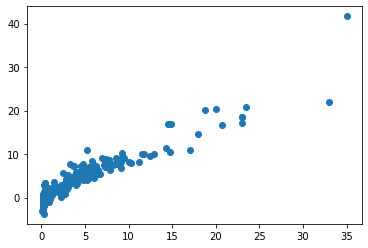

In [19]:
plt.scatter(Y_train, LR_pred)  

Evaluation on Test Data

In [20]:
LR_pred2 = LR.predict(X_test)  

In [21]:
score = metrics.r2_score(Y_test, LR_pred2) 
print('R Squared Error: ', score)

R Squared Error:  0.8401532365378392


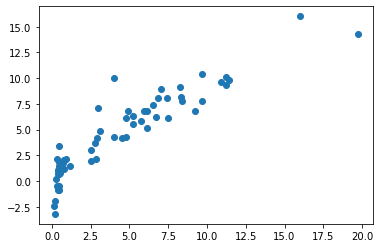

In [22]:
plt.scatter(Y_test, LR_pred2) 

In [24]:
import pickle
# open a file, where you want to store the data
file = open('linear_regression.pkl', 'wb')

# dump information to that file
pickle.dump(LR, file) 